In [1]:
import numpy as np

class Perceptron:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])

        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0]  += update
                errors += 1 if update != 0 else 0
            self.errors_.append(errors)
        return self

    def net_input(self, x):
        return x.dot(self.w_[1:]) + self.w_[0]

    def predict(self, x):
        return np.where(self.net_input(x) >= 0.0, 1, -1)

In [2]:
import os
import pandas as pd

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(url, header=None, encoding='utf-8')

df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


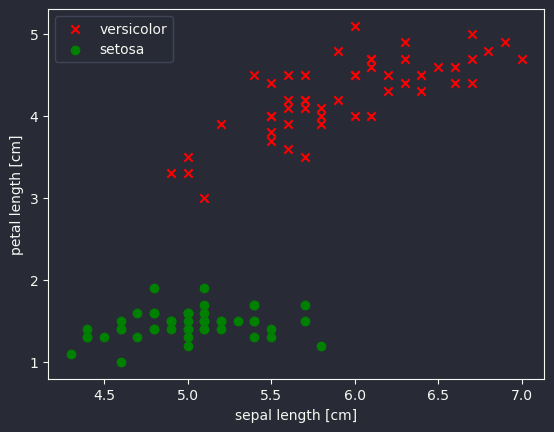

In [3]:
import matplotlib.pyplot as plt
import numpy as np

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-versicolor', 1, -1)

X = df.iloc[0:100, [0, 2]].values

plt.scatter(X[50:100, 0], X[50:100, 1], marker='x', color='red', label='versicolor')
plt.scatter(X[0:50, 0], X[0:50, 1], marker='o', color='green', label='setosa')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')

plt.legend(loc='upper left')

plt.show()

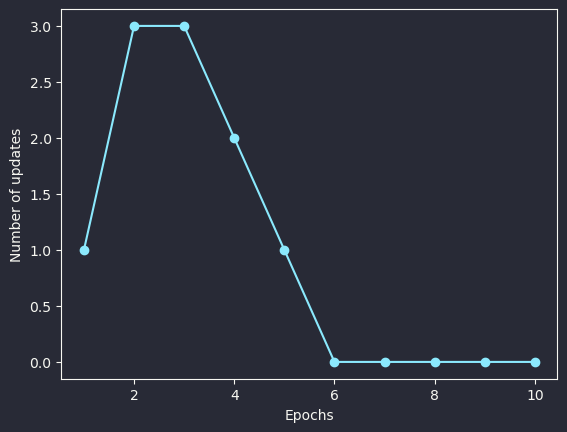

In [4]:
ppn = Perceptron(n_iter=10, eta=0.1)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')

plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.show()

In [5]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.01):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'yellow', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

/tmp/ipykernel_27312/3276380268.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


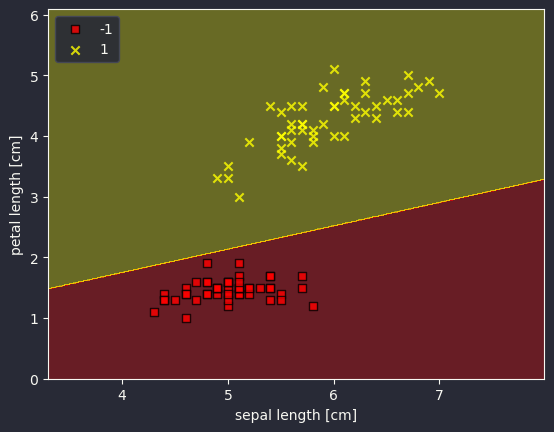

In [6]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.show()

In [3]:
import os
import pandas as pd

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(url, header=None, encoding='utf-8')

X = df.iloc[0:100, [0, 2]].values

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-versicolor', 1, -1)

In [7]:
import numpy as np

class AdalineGD:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])

        self.cost_ = []

        for _ in range(self.n_iter):
            output = self.activation(net_input(X))



In [12]:
import numpy as np

class AdalineGD(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            print("errors =", errors)
            print(self.w_[1:], "+=", self.eta, "*", X.T.dot(errors))
            self.w_[1:] += self.eta * np.dot(X.T, errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return X

    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

In [13]:
ada = AdalineGD(eta=0.0001)

fit = ada.fit(X, y)
z = ada.net_input(X)

errors = [-0.97764947 -0.97887298 -0.98062467 -0.98018008 -0.97826123 -0.97422969
 -0.98070825 -0.97773306 -0.98193177 -0.97834481 -0.97528603 -0.9784284
 -0.97948474 -0.98412804 -0.97442352 -0.97345076 -0.97634237 -0.97764947
 -0.97239442 -0.9771213  -0.97422969 -0.9771213  -0.98282094 -0.97606496
 -0.97684388 -0.97720488 -0.97720488 -0.97650954 -0.97703772 -0.97904015
 -0.9784284  -0.97528603 -0.97650954 -0.97520245 -0.97834481 -0.97931757
 -0.97573062 -0.97834481 -0.98245994 -0.9771213  -0.9787894  -0.98184818
 -0.98245994 -0.97720488 -0.97500861 -0.97948474 -0.97659313 -0.98070825
 -0.97589779 -0.97826123  1.05140357  1.04667669  1.05184815  1.03853002
  1.04781661  1.04239439  1.04712127  1.03116228  1.04842837  1.03616658
  1.03283038  1.04203339  1.0415888   1.04589776  1.03702909  1.04798378
  1.04178263  1.04089346  1.04545317  1.0386136   1.04520242  1.04220056
  1.04817762  1.04589776  1.04562034  1.04737203  1.05070823  1.05115281
  1.04422966  1.03711267  1.03747368  1.036

In [39]:
ada.predict(X)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

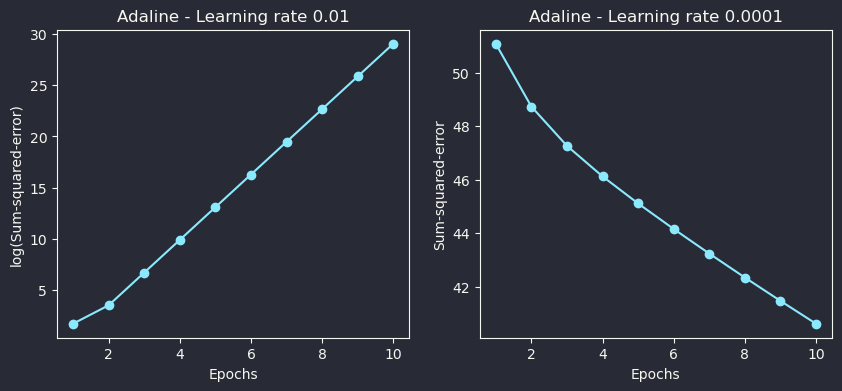

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

# plt.savefig('images/02_11.png', dpi=300)
plt.show()

In [233]:
import pandas as pd
import numpy as np

In [480]:
bios = pd.read_csv('https://raw.githubusercontent.com/KeithGalli/complete-pandas-tutorial/refs/heads/master/data/bios.csv')
coffee = pd.read_csv('https://raw.githubusercontent.com/KeithGalli/complete-pandas-tutorial/refs/heads/master/warmup-data/coffee.csv')
nocs = pd.read_csv('https://raw.githubusercontent.com/KeithGalli/complete-pandas-tutorial/refs/heads/master/data/noc_regions.csv')

In [174]:
bios.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25


In [489]:
nocs.sample(10)

,NOC,region,notes
159,PLE,Palestine,NaN
106,KEN,Kenya,NaN
200,TJK,Tajikistan,NaN
214,URS,Russia,NaN
163,POR,Portugal,NaN
16,BAN,Bangladesh,NaN
92,IND,India,NaN
150,NOR,Norway,NaN
11,ASA,American Samoa,NaN
51,CRT,Greece,Crete


In [236]:
bios.loc[bios['name'].str.contains("Dmitry"), :]

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
2532,2544,Dmitry Mazunov,1971-05-12,Nizhny Novgorod,Nizhny Novgorod,RUS,Russian Federation Unified Team,185.0,75.0,NaN
2795,2807,Dmitry Tomashevich,1974-03-06,Toshkent,Toshkent Shahri,UZB,Uzbekistan,NaN,NaN,NaN
7153,7190,Dmitry Sukharev,1960-12-25,Buston,Sughd,TJK,Unified Team,208.0,108.0,NaN
7981,8022,Dmitry Vybornov,1970-02-23,NaN,NaN,NaN,Russian Federation,188.0,81.0,NaN
10205,10261,Dmitry Torlopov,1977-08-12,NaN,NaN,NaN,Kazakhstan,180.0,85.0,NaN
...,...,...,...,...,...,...,...,...,...,...
145050,148762,Dmitry Lopin,1991-07-29,Greki,Krasnodar Kray,RUS,ROC,NaN,NaN,NaN
145077,148789,Dmitry Mironov,1992-10-22,Chelyabinsk,Chelyabinsk,RUS,ROC,NaN,NaN,NaN
145100,148813,Dmitry Kozlovsky,1999-12-23,NaN,NaN,NaN,ROC,NaN,NaN,NaN
145126,148842,Dmitry Voronkov,2000-09-10,Angarsk,Irkutsk,RUS,ROC,NaN,NaN,NaN


In [265]:
coffee['price'] = np.where(coffee['Coffee Type'] == 'Latte', 2.99, 3.99)

In [266]:
coffee.drop(columns='nprice', inplace=True)

In [249]:
coffee_new = coffee

In [267]:
coffee['revenue'] = coffee['price'] * coffee['Units Sold']

In [277]:
coffee = coffee.rename(columns={'new_price':'price'})

In [278]:
coffee

,Day,Coffee Type,Units Sold,price,revenue
0,Monday,Espresso,25,3.99,99.75
1,Monday,Latte,15,2.99,44.85
2,Tuesday,Espresso,30,3.99,119.70
3,Tuesday,Latte,20,2.99,59.80
4,Wednesday,Espresso,35,3.99,139.65
5,Wednesday,Latte,25,2.99,74.75
6,Thursday,Espresso,40,3.99,159.60
7,Thursday,Latte,30,2.99,89.70
8,Friday,Espresso,45,3.99,179.55
9,Friday,Latte,35,2.99,104.65


In [300]:
bios['first_name'] = bios['name'].str.split(' ').str[0]

In [301]:
bios

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,first_name
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,Jean-François
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN,Arnaud
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17,Jean
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20,Jacques
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25,Albert
...,...,...,...,...,...,...,...,...,...,...,...
145495,149222,Polina Luchnikova,2002-01-30,Serov,Sverdlovsk,RUS,ROC,167.0,61.0,NaN,Polina
145496,149223,Valeriya Merkusheva,1999-09-20,Moskva (Moscow),Moskva,RUS,ROC,168.0,65.0,NaN,Valeriya
145497,149224,Yuliya Smirnova,1998-05-08,Kotlas,Arkhangelsk,RUS,ROC,163.0,55.0,NaN,Yuliya
145498,149225,André Foussard,1899-05-19,Niort,Deux-Sèvres,FRA,France,166.0,NaN,1986-03-18,André


In [327]:
bios_new.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
0,1,Jean-François Blanchy,12.12.1886,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02
1,2,Arnaud Boetsch,01.04.1969,Meulan,Yvelines,FRA,France,183.0,76.0,NaN
2,3,Jean Borotra,13.08.1898,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17
3,4,Jacques Brugnon,11.05.1895,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20
4,5,Albert Canet,17.04.1878,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25


In [316]:
bios_new['born_date'] = pd.to_datetime(bios.born_date, format="%Y-%m-%d")

In [451]:
bios_new[['name', 'born_date']].sort_values('born_date', ascending=False)

,name,born_date
143149,Hend Zaza,2009-01-01
140902,Kokona Hiraki,2008-08-26
139592,Sky Brown,2008-07-07
137792,Rayssa Leal,2008-01-04
140904,Momiji Nishiya,2007-08-30
...,...,...
126484,Werner Fehr,NaN
135275,Aleko Mulos,NaN
135280,Louis Léstienne,NaN
144129,René Van Damme,NaN


In [465]:
bios_new

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,bmi
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,No data
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN,Norm
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17,Norm
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20,Norm
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25,No data
...,...,...,...,...,...,...,...,...,...,...,...
145495,149222,Polina Luchnikova,2002-01-30,Serov,Sverdlovsk,RUS,ROC,167.0,61.0,NaN,Norm
145496,149223,Valeriya Merkusheva,1999-09-20,Moskva (Moscow),Moskva,RUS,ROC,168.0,65.0,NaN,Norm
145497,149224,Yuliya Smirnova,1998-05-08,Kotlas,Arkhangelsk,RUS,ROC,163.0,55.0,NaN,Norm
145498,149225,André Foussard,1899-05-19,Niort,Deux-Sèvres,FRA,France,166.0,NaN,1986-03-18,No data


In [383]:
bios_new = bios.copy()

In [429]:
def height_category(row):
    if pd.isna(row['weight_kg']) or pd.isna(row['height_cm']):
        return 'No data'
        
    bmi = row['weight_kg'] / pow(row['height_cm'] * 0.01, 2)
    
    if bmi <= 16:
        return 'Big deficit'
    elif bmi <= 18.5:
        return 'Deficit'
    elif bmi <= 25:
        return 'Norm'
    elif bmi  <= 30:
        return 'Overweight'
    elif bmi <= 35:
        return 'First obesity'
    elif bmi <= 40:
        return 'second obesity'
    else:
        return 'Third obesity'

In [430]:
bios_new['bmi'] = bios_new.apply(height_category, axis=1)

In [479]:
bios_new[['name', 'NOC', 'born_date', 'height_cm', 'weight_kg', 'bmi']][
    bios_new['height_cm'].between(195, 198) &
    bios_new['weight_kg'].between(75, 78) &
    (pd.to_datetime(bios_new['born_date'], format='%Y-%m-%d').dt.year.between(1996, 2005))
].sort_values(by='weight_kg', ascending=False)

,name,NOC,born_date,height_cm,weight_kg,bmi
128188,Anna Danesi,Italy,1996-04-20,195.0,75.0,Norm
133657,Filippo Ganna,Italy,1996-07-25,195.0,75.0,Norm


In [472]:
bios_new[pd.to_datetime(bios_new['born_date'], format='%Y-%m-%d').dt.year == 1886]

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,bmi
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,No data
66,67,Phyllis Satterthwaite,1886-01-26,Kensington,England,GBR,Great Britain,NaN,NaN,1962-01-20,No data
103,104,Arthur Lowe,1886-01-29,NaN,NaN,NaN,Great Britain,NaN,NaN,1958-10-22,No data
162,163,Fritz von Bissing,1886-09-09,Metz,Moselle,FRA,Germany,NaN,NaN,1954-03-18,No data
185,186,Avgoustos Zerlentis,1886-11-05,Al-Iskanderiya (Alexandria),Al-Iskanderiya,EGY,Greece,NaN,NaN,1954-01-01,No data
...,...,...,...,...,...,...,...,...,...,...,...
88883,89593,Bruno Leuzinger,1886-01-06,NaN,NaN,NaN,Switzerland,NaN,NaN,1952-12-23,No data
95083,95852,Nathaniel Niles,1886-07-05,Boston,Massachusetts,USA,United States,NaN,NaN,1932-07-11,No data
96040,96815,Jaroslav Řezáč,1886-02-06,Jičín,Královéhradecký kraj,CZE,Czechoslovakia,NaN,NaN,1974-05-29,No data
99997,100822,Trevor Hedberg,1886-02-02,Hobart,Tasmania,AUS,Great Britain,NaN,NaN,1954-09-11,No data


In [538]:
bios

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25
...,...,...,...,...,...,...,...,...,...,...
145495,149222,Polina Luchnikova,2002-01-30,Serov,Sverdlovsk,RUS,ROC,167.0,61.0,NaN
145496,149223,Valeriya Merkusheva,1999-09-20,Moskva (Moscow),Moskva,RUS,ROC,168.0,65.0,NaN
145497,149224,Yuliya Smirnova,1998-05-08,Kotlas,Arkhangelsk,RUS,ROC,163.0,55.0,NaN
145498,149225,André Foussard,1899-05-19,Niort,Deux-Sèvres,FRA,France,166.0,NaN,1986-03-18


In [535]:
nocs.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [529]:
print(np.setdiff1d(nocs.NOC.dropna().unique(), bios.born_country.dropna().unique()), '\n\n',
np.setdiff1d(bios.born_country.dropna().unique(), nocs.NOC.dropna().unique()))

['AHO' 'ANZ' 'BOH' 'CRT' 'EUN' 'FRG' 'GDR' 'IOA' 'ISV' 'LIB' 'MAL' 'NBO'
 'NFL' 'RHO' 'ROT' 'SAA' 'SCG' 'SIN' 'TCH' 'UAR' 'UNK' 'URS' 'VNM' 'WIF'
 'YAR' 'YMD' 'YUG'] 

 ['AGU' 'Aarhus' 'Altmark' 'CUR' 'Cologne' 'Corfu' 'Elster' 'FAR' 'FLI'
 'FPN' 'GIB' 'GRL' 'GUE' 'Havel' 'IOM' 'JER' 'LBN' 'Luppe' 'MQE' 'MRT'
 'MTS' 'Milde' 'Munich' 'NCD' 'NFI' 'Prignitz' 'SGP' 'SMT' 'Saale'
 'Spreewald' 'TKS' 'Upland' 'Vienna']


In [514]:
bios.born_country.unique()

array(['FRA', 'GBR', nan, 'MAR', 'FPN', 'IRQ', 'USA', 'RSA', 'IRL', 'IND',
       'CHN', 'JAM', 'AUS', 'CAN', 'GER', 'ROU', 'BRA', 'CZE', 'RUS',
       'GRE', 'EGY', 'HUN', 'POL', 'MEX', 'SRB', 'SVK', 'INA', 'SRI',
       'PAK', 'ESP', 'AUT', 'BEL', 'BLR', 'BUL', 'CRC', 'DEN', 'EST',
       'FIN', 'SUI', 'GEO', 'ARG', 'ARM', 'BAH', 'CAM', 'CHI', 'ISR',
       'UZB', 'ITA', 'JPN', 'KOR', 'LAT', 'UKR', 'LTU', 'LUX', 'MAD',
       'MAS', 'MRI', 'NED', 'NGR', 'NOR', 'TUR', 'NZL', 'PAR', 'PER',
       'BAR', 'HKG', 'GUY', 'CGO', 'COD', 'CMR', 'COL', 'PUR', 'TPE',
       'VIE', 'CUB', 'DOM', 'CRO', 'ECU', 'ESA', 'MDA', 'MGL', 'ZIM',
       'PHI', 'POR', 'SLO', 'SWE', 'TJK', 'CIV', 'BIH', 'THA', 'CAF',
       'ALG', 'PRK', 'KAZ', 'UGA', 'TTO', 'TUN', 'AZE', 'URU', 'MYA',
       'VEN', 'ETH', 'FIJ', 'SEN', 'LBA', 'GAB', 'NCA', 'CUR', 'ARU',
       'ANG', 'Cologne', 'KOS', 'GHA', 'GUA', 'TLS', 'NEP', 'IRI', 'KEN',
       'KGZ', 'LBR', 'MAW', 'MLI', 'NAM', 'CPV', 'SUR', 'SLE', 'NIG',
       'PAN

In [539]:
bios_new = pd.merge(bios, nocs, left_on='born_country', right_on='NOC', how='left')

In [547]:
bios_new.rename(columns={'region':'born_country_full'}, inplace=True)

In [548]:
bios_new.rename(columns={'NOC_x':'NOC'}, inplace=True)

In [551]:
bios_new.drop(columns=['notes'], inplace=True)

In [582]:
bios_new

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,born_country_full
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,France
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN,France
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17,France
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20,France
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25,UK
...,...,...,...,...,...,...,...,...,...,...,...
145495,149222,Polina Luchnikova,2002-01-30,Serov,Sverdlovsk,RUS,ROC,167.0,61.0,NaN,Russia
145496,149223,Valeriya Merkusheva,1999-09-20,Moskva (Moscow),Moskva,RUS,ROC,168.0,65.0,NaN,Russia
145497,149224,Yuliya Smirnova,1998-05-08,Kotlas,Arkhangelsk,RUS,ROC,163.0,55.0,NaN,Russia
145498,149225,André Foussard,1899-05-19,Niort,Deux-Sèvres,FRA,France,166.0,NaN,1986-03-18,France


In [583]:
bios

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25
...,...,...,...,...,...,...,...,...,...,...
145495,149222,Polina Luchnikova,2002-01-30,Serov,Sverdlovsk,RUS,ROC,167.0,61.0,NaN
145496,149223,Valeriya Merkusheva,1999-09-20,Moskva (Moscow),Moskva,RUS,ROC,168.0,65.0,NaN
145497,149224,Yuliya Smirnova,1998-05-08,Kotlas,Arkhangelsk,RUS,ROC,163.0,55.0,NaN
145498,149225,André Foussard,1899-05-19,Niort,Deux-Sèvres,FRA,France,166.0,NaN,1986-03-18


In [586]:
bios_nocs = pd.concat([bios['born_country'], bios_new['born_country_full']], axis=1, ignore_index=True)

In [594]:
bios_new.isna().sum()

athlete_id                0
name                      0
born_date              1807
born_city             34592
born_region           34592
born_country          34592
NOC                       1
height_cm             38849
weight_kg             43430
died_date            111560
born_country_full     34864
dtype: int64

In [596]:
bios_new.dropna(inplace=True)

In [649]:
bios_new

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,born_country_full
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17,France
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20,France
107,108,Anders Nielsen,1967-02-24,Cape Town,Western Cape,RSA,Great Britain,173.0,70.0,2010-07-29,South Africa
258,259,Tonny Maringgi,1959-06-10,Kendari,Sulawesi Tenggara,INA,Indonesia,167.0,65.0,2019-09-15,Indonesia
300,301,Jackson Fear,1978-01-13,Sydney,New South Wales,AUS,Australia,178.0,125.0,2006-07-21,Australia
...,...,...,...,...,...,...,...,...,...,...,...
135272,138435,Art Child,1916-09-15,West Ham,England,GBR,Great Britain,180.0,71.0,1996-06-30,UK
135277,138440,Toyoko Yoshino,1920-02-12,Abashiri,Hokkaido,JPN,Japan,159.0,54.0,2015-01-24,Japan
135283,138446,Jacques Demaré,1900-09-01,Vincennes,Val-de-Marne,FRA,France,185.0,78.0,1935-12-09,France
136653,139884,Johanna Bassani,2002-04-25,Vöcklabruck,Oberösterreich,AUT,Austria,163.0,54.0,2020-05-05,Austria


In [661]:
bios_new[(bios_new.born_country_full != bios_new.NOC)][['name', 'born_country_full', 'NOC']].sample(10)

,name,born_country_full,NOC
68509,John Edgington,UK,Great Britain
78343,Lambert Redd,USA,United States
71063,Bob Tisdall,Sri Lanka,Ireland
68836,Fred Norris,UK,Great Britain
44164,Igor Bakalov,Russia,Soviet Union
84334,Aleksandr Danilin,Russia,Soviet Union
83798,Jáchym Bulín,Poland,Czechoslovakia
41812,Jacques Decaux,Switzerland,France
26047,Jeong Ryo-Hwan,South Korea,Republic of Korea
77109,Feodosy Vanin,Russia,Soviet Union


In [671]:
bios_new[bios_new['born_country_full'] == 'Germany']['born_region'].value_counts()

born_region
Nordrhein-Westfalen       104
Bayern                     83
Berlin                     80
Baden-Württemberg          53
Sachsen                    46
Sachsen-Anhalt             41
Hessen                     37
Thüringen                  31
Mecklenburg-Vorpommern     27
Niedersachsen              26
Hamburg                    25
Schleswig-Holstein         24
Rheinland-Pfalz            20
Brandenburg                18
Bremen                      6
Saarland                    5
Name: count, dtype: int64

In [704]:
coffee.loc[coffee['Coffee Type'] == 'Latte', 'price'] = 2.99

In [712]:
coffee.groupby('Coffee Type')['Units Sold'].sum()

Coffee Type
Espresso    265
Latte       195
Name: Units Sold, dtype: int64

In [715]:
coffee['revenue'] = coffee['Units Sold'] * coffee['price']

In [732]:
pivot = coffee.pivot(columns='Coffee Type', index='Day', values='revenue').sort_index()

In [735]:
pivot['Latte'].value_counts()

Latte
104.65    3
44.85     1
89.70     1
59.80     1
74.75     1
Name: count, dtype: int64

In [741]:
pivot.sum(axis=1)

Day
Friday       194.2
Monday        94.6
Saturday     194.2
Sunday       194.2
Thursday     169.3
Tuesday      119.5
Wednesday    144.4
dtype: float64

In [745]:
bios.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25


In [750]:
bios['born_date'] = pd.to_datetime(bios['born_date'], format="%Y-%m-%d")

In [768]:
bios.groupby('born_country')['name'].count().reset_index().sort_values(by='name', ascending=False).head(25)

,born_country,name
225,USA,9641
82,GER,6891
78,GBR,5792
74,FRA,5143
106,ITA,4709
36,CAN,4616
182,RUS,4276
11,AUS,3009
174,POL,2942
203,SWE,2853


In [814]:
coffee['total_revenue'] = coffee['revenue'].cumsum()

In [811]:
coffee.pivot(index='Day', columns='Coffee Type', values='Units Sold')

Coffee Type,Espresso,Latte
Day,,
Friday,45,35
Monday,25,15
Saturday,45,35
Sunday,45,35
Thursday,40,30
Tuesday,30,20
Wednesday,35,25


In [815]:
coffee

,Day,Coffee Type,Units Sold,price,revenue,yesterday_revenue,sold in 3 days,top_revenue,total_revenue
0,Monday,Espresso,25,1.99,49.75,NaN,NaN,13.0,49.75
1,Monday,Latte,15,2.99,44.85,NaN,NaN,14.0,94.60
2,Tuesday,Espresso,30,1.99,59.70,49.75,154.30,12.0,154.30
3,Tuesday,Latte,20,2.99,59.80,44.85,164.35,11.0,214.10
4,Wednesday,Espresso,35,1.99,69.65,59.70,189.15,10.0,283.75
5,Wednesday,Latte,25,2.99,74.75,59.80,204.20,9.0,358.50
6,Thursday,Espresso,40,1.99,79.60,69.65,224.00,8.0,438.10
7,Thursday,Latte,30,2.99,89.70,74.75,244.05,4.0,527.80
8,Friday,Espresso,45,1.99,89.55,79.60,258.85,5.0,617.35
9,Friday,Latte,35,2.99,104.65,89.70,283.90,1.0,722.00


Expected '3's: 100.0
Observed '3's: 120
Standard deviation: 9.13
Sigma significance: 2.19σ
p-value: 0.028460

Conclusion: This result is moderately significant (~2σ) - suggestive but not conclusive.


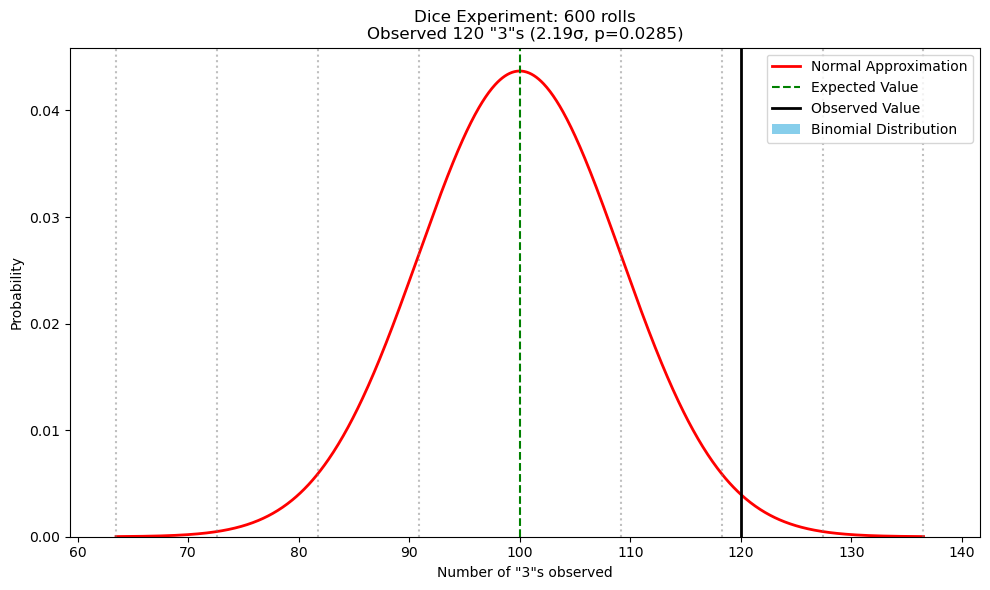

In [816]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, binom

# Parameters
num_rolls = 600  # Total number of dice rolls
expected_prob = 1/6  # Probability of rolling a 3 with fair die
observed_3s = 120  # Change this to your observed count

# Calculate expected and standard deviation
expected_3s = num_rolls * expected_prob
std_dev = np.sqrt(num_rolls * expected_prob * (1 - expected_prob))

# Calculate how many sigma this observation is
sigma = (observed_3s - expected_3s) / std_dev

# Calculate p-value (two-tailed)
p_value = 2 * (1 - norm.cdf(abs(sigma)))  # Two-tailed test

# Create binomial distribution
x = np.arange(expected_3s - 4*std_dev, expected_3s + 4*std_dev + 1)
y = binom.pmf(x, num_rolls, expected_prob)

# Create normal approximation for smooth curve
x_norm = np.linspace(expected_3s - 4*std_dev, expected_3s + 4*std_dev, 1000)
y_norm = norm.pdf(x_norm, expected_3s, std_dev)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(x, y, color='skyblue', label='Binomial Distribution')
plt.plot(x_norm, y_norm, 'r-', linewidth=2, label='Normal Approximation')
plt.axvline(expected_3s, color='green', linestyle='--', label='Expected Value')

# Mark observed value
plt.axvline(observed_3s, color='black', linestyle='-', linewidth=2, label='Observed Value')

# Add sigma lines
for s in range(1, 5):
    plt.axvline(expected_3s + s*std_dev, color='gray', linestyle=':', alpha=0.5)
    plt.axvline(expected_3s - s*std_dev, color='gray', linestyle=':', alpha=0.5)

# Annotations
plt.title(f'Dice Experiment: {num_rolls} rolls\nObserved {observed_3s} "3"s ({sigma:.2f}σ, p={p_value:.4f})')
plt.xlabel('Number of "3"s observed')
plt.ylabel('Probability')
plt.legend()

# Print results
print(f"Expected '3's: {expected_3s:.1f}")
print(f"Observed '3's: {observed_3s}")
print(f"Standard deviation: {std_dev:.2f}")
print(f"Sigma significance: {sigma:.2f}σ")
print(f"p-value: {p_value:.6f}")

# Interpretation
if sigma >= 3:
    print("\nConclusion: This result is statistically significant (>3σ) - strong evidence the die is biased!")
elif sigma >= 2:
    print("\nConclusion: This result is moderately significant (~2σ) - suggestive but not conclusive.")
else:
    print("\nConclusion: This result is not statistically significant - could be random fluctuation.")

plt.tight_layout()
plt.show()

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [6]:
gas = pd.read_csv('data/gas_prices.csv')

In [25]:
gas

,Year,Australia,Canada,France,Germany,Italy,Japan,Mexico,South Korea,UK,USA
0,1990,NaN,1.87,3.63,2.65,4.59,3.16,1.00,2.05,2.82,1.16
1,1991,1.96,1.92,3.45,2.90,4.50,3.46,1.30,2.49,3.01,1.14
2,1992,1.89,1.73,3.56,3.27,4.53,3.58,1.50,2.65,3.06,1.13
3,1993,1.73,1.57,3.41,3.07,3.68,4.16,1.56,2.88,2.84,1.11
4,1994,1.84,1.45,3.59,3.52,3.70,4.36,1.48,2.87,2.99,1.11
5,1995,1.95,1.53,4.26,3.96,4.00,4.43,1.11,2.94,3.21,1.15
6,1996,2.12,1.61,4.41,3.94,4.39,3.64,1.25,3.18,3.34,1.23
7,1997,2.05,1.62,4.00,3.53,4.07,3.26,1.47,3.34,3.83,1.23
8,1998,1.63,1.38,3.87,3.34,3.84,2.82,1.49,3.04,4.06,1.06
9,1999,1.72,1.52,3.85,3.42,3.87,3.27,1.79,3.80,4.29,1.17


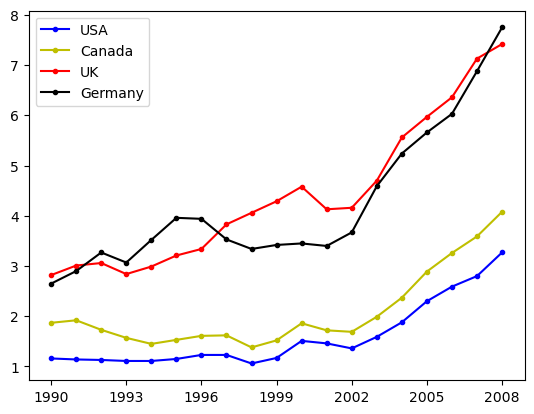

In [60]:
plt.plot(gas.Year, gas.USA, 'b.-', label='USA')
plt.plot(gas.Year, gas.Canada, 'y.-', label='Canada')
plt.plot(gas.Year, gas.UK, 'r.-', label='UK')
plt.plot(gas.Year, gas.Germany, 'k.-', label='Germany')

plt.legend()

plt.xticks(gas.Year[::3])

plt.show()

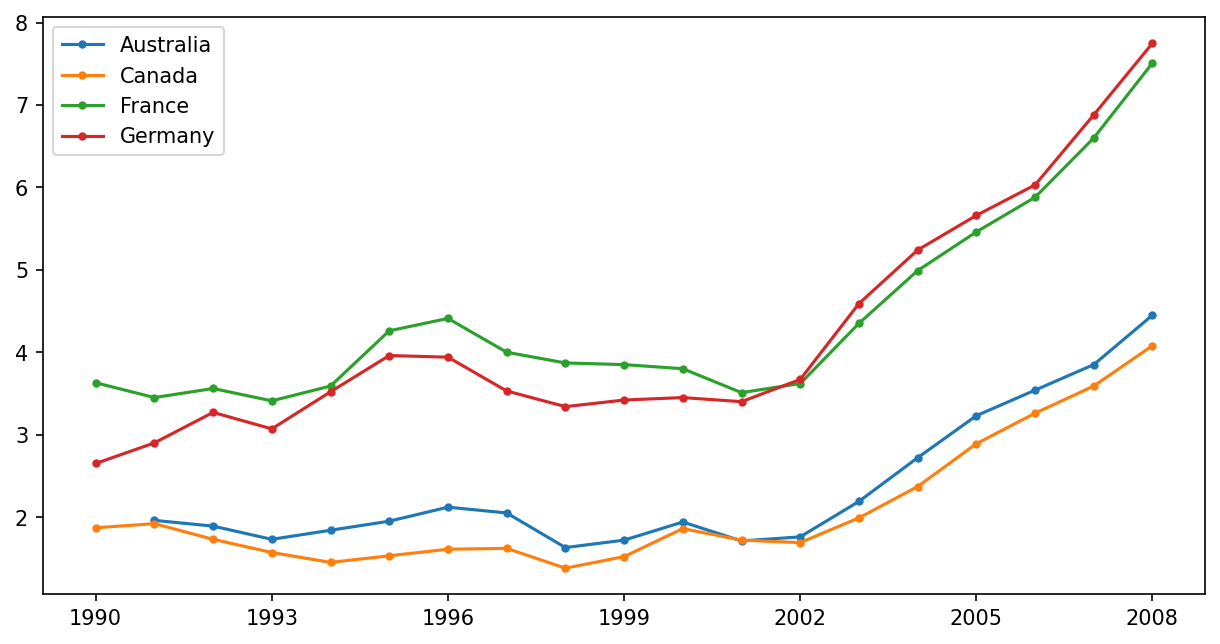

In [79]:
plt.figure(figsize=[10,5],dpi=150)

for country in gas.columns[1:int(len(gas.columns)/2)]:
    plt.plot(gas.Year, gas[country], '.-', label=country)

plt.legend()

plt.xticks(gas.Year[::3])

plt.show()

In [3]:
fifa = pd.read_csv('data/fifa_data.csv')
pd.set_option('display.max_columns', None)

In [166]:
fifa.sample(10)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
15308,15308,240641,S. Kassar,28,https://cdn.sofifa.org/players/4/19/240641.png,Saudi Arabia,https://cdn.sofifa.org/flags/183.png,59,59,Ohod Club,https://cdn.sofifa.org/teams/2/light/113219.png,€120K,€3K,1502,Left,1.0,2.0,2.0,High/ Medium,Lean,No,LM,17.0,"Aug 9, 2017",NaN,2019,5'7,132.0,46+2,46+2,46+2,52+2,49+2,49+2,49+2,52+2,51+2,51+2,51+2,54+2,51+2,51+2,51+2,54+2,58+2,55+2,55+2,55+2,58+2,58+2,56+2,56+2,56+2,58+2,55.0,31.0,42.0,55.0,22.0,56.0,31.0,48.0,48.0,49.0,76.0,74.0,66.0,53.0,81.0,32.0,61.0,66.0,59.0,28.0,54.0,55.0,49.0,51.0,37.0,47.0,63.0,58.0,57.0,9.0,5.0,12.0,10.0,9.0,198000.0
15191,15191,228315,A. Purzycki,20,https://cdn.sofifa.org/players/4/19/228315.png,Poland,https://cdn.sofifa.org/flags/37.png,60,68,Miedź Legnica,https://cdn.sofifa.org/teams/2/light/112505.png,€270K,€1K,1640,Right,1.0,3.0,2.0,Medium/ Medium,Lean,No,RCM,13.0,"Sep 6, 2017",NaN,2020,5'10,154.0,52+2,52+2,52+2,56+2,56+2,56+2,56+2,56+2,58+2,58+2,58+2,59+2,59+2,59+2,59+2,59+2,59+2,58+2,58+2,58+2,59+2,58+2,55+2,55+2,55+2,58+2,49.0,45.0,49.0,63.0,46.0,59.0,51.0,43.0,59.0,58.0,68.0,68.0,63.0,54.0,81.0,52.0,66.0,79.0,49.0,41.0,51.0,56.0,50.0,66.0,52.0,62.0,54.0,58.0,56.0,7.0,8.0,15.0,9.0,15.0,419000.0
18027,18027,205861,A. Mills,24,https://cdn.sofifa.org/players/4/19/205861.png,England,https://cdn.sofifa.org/flags/14.png,50,55,Östersunds FK,https://cdn.sofifa.org/teams/2/light/113173.png,€30K,€1K,969,Right,1.0,2.0,1.0,Medium/ Medium,Normal,No,GK,31.0,"Oct 31, 2017",NaN,2018,6'0,163.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,14.0,12.0,28.0,11.0,14.0,16.0,16.0,21.0,23.0,40.0,48.0,37.0,46.0,65.0,20.0,59.0,23.0,55.0,19.0,25.0,20.0,16.0,11.0,22.0,30.0,13.0,16.0,17.0,51.0,46.0,45.0,49.0,51.0,40000.0
17993,17993,245467,J. Szpaderski,19,https://cdn.sofifa.org/players/4/19/245467.png,Poland,https://cdn.sofifa.org/flags/37.png,51,66,Miedź Legnica,https://cdn.sofifa.org/teams/2/light/112505.png,€70K,€1K,804,Right,1.0,2.0,1.0,Medium/ Medium,Lean,No,GK,98.0,"Jul 1, 2018",NaN,2019,6'3,185.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,5.0,13.0,28.0,6.0,11.0,13.0,13.0,21.0,16.0,20.0,30.0,35.0,39.0,23.0,17.0,37.0,18.0,63.0,9.0,22.0,14.0,8.0,30.0,12.0,36.0,9.0,13.0,11.0,49.0,59.0,47.0,40.0,59.0,138000.0
13083,13083,223750,D. Steininger,23,https://cdn.sofifa.org/players/4/19/223750.png,Germany,https://cdn.sofifa.org/flags/21.png,62,70,SpVgg Greuther Fürth,https://cdn.sofifa.org/teams/2/light/165.png,€450K,€2K,1539,Right,1.0,3.0,2.0,Medium/ Medium,Normal,No,RM,31.0,"Feb 19, 2014",NaN,2020,6'2,174.0,64+2,64+2,64+2,62+2,62+2,62+2,62+2,62+2,59+2,59+2,59+2,61+2,52+2,52+2,52+2,61+2,46+2,42+2,42+2,42+2,46+2,44+2,39+2,39+2,39+2,44+2,57.0,67.0,60.0,55.0,59.0,65.0,53.0,42.0,49.0,66.0,74.0,73.0,64.0,59.0,60.0,65.0,46.0,55.0,68.0,49.0,41.0,23.0,64.0,47.0,57.0,46.0,34.0,17.0,20.0,10.0,7.0,8.0,12.0,13.0,788000.0
10760,10760,212431,Kim Nam Chun,29,https://cdn.sofifa.org/players/4/19/212431.png,Korea Republic,https://cdn.sofifa.org/flags/167.png,65,66,FC Seoul,https://cdn.sofifa.org/teams/2/light/982.png,€475K,€2K,1400,Right,1.0,3.0,2.0,Low/ High,Normal,No,CB,26.0,"Jan 1, 2013",NaN,2023,6'0,172.0,38+2,38+2,38+2,36+2,36+2,36+2,36+2,36+2,41+2,41

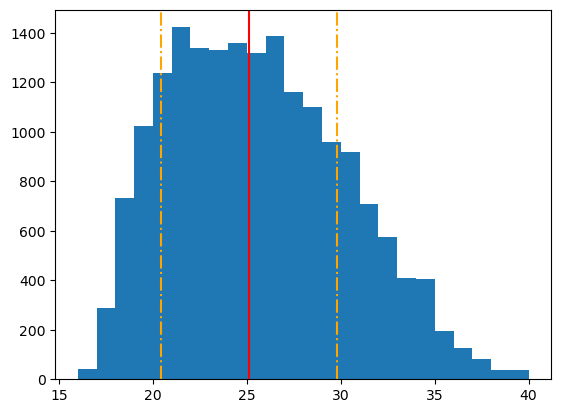

In [209]:
bins = np.arange(16,41,1)

plt.hist(fifa.Age, bins=bins)
plt.axvline(fifa.Age.mean(), color='r')
plt.axvline(fifa.Age.mean() + fifa.Age.std(), color='orange', linestyle='-.')
plt.axvline(fifa.Age.mean() - fifa.Age.std(), color='orange', linestyle='-.')

plt.show()

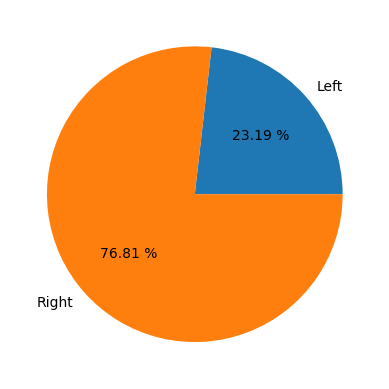

In [106]:
left = fifa[fifa['Preferred Foot'] == 'Left'].count().iloc[0]
right = fifa[fifa['Preferred Foot'] == 'Right'].count().iloc[0]

labels = ['Left', 'Right']

plt.pie([left, right], labels=labels, autopct='%.2f %%')

plt.show()

In [163]:
fifa.Weight = [int(x.strip('lbs')) if type(x) == str else int(x) if not pd.isna(x) else x for x in fifa.Weight]

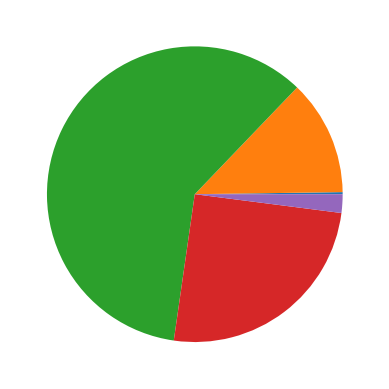

In [168]:
fifa.Weight = [int(x.strip('lbs')) if type(x)==str else х for х in fifa.Weight]

light = fifa.loc[fifa.Weight < 125].count().iloc[0]

light_medium = fifa.loc[(fifa.Weight >= 125) & (fifa.Weight < 150)].count().iloc[0]
medium = fifa[(fifa.Weight >= 150) & (fifa.Weight < 175)].count().iloc[0]
medium_heavy = fifa[(fifa.Weight >= 175) & (fifa.Weight < 200)].count().iloc[0]
heavy = fifa[(fifa.Weight >= 200)].count().iloc[0]

weights = [light, light_medium, medium, medium_heavy, heavy]

plt.pie(weights)

plt.show()

In [57]:
fifa.loc[(fifa['Release Clause'].notna()) & (fifa.Nationality == 'Russia'), ['Name', 'Release Clause', 'Nationality']].sort_values(ascending=False, by='Release Clause')

,Name,Release Clause,Nationality
276,Mário Fernandes,40700000.0,Russia
381,F. Smolov,38900000.0,Russia
577,A. Golovin,35700000.0,Russia
597,R. Zobnin,34500000.0,Russia
676,A. Dzagoev,27500000.0,Russia
...,...,...,...
15677,S. Serderov,326000.0,Russia
15176,V. Sirotov,297000.0,Russia
16007,A. Aliev,261000.0,Russia
16270,R. Kim,232000.0,Russia


In [87]:
fifa.loc[(fifa['Release Clause'].notna()) & (fifa.Nationality == 'Switzerland'), ['Name', 'Release Clause', 'Nationality']].sort_values(ascending=False, by='Release Clause')

,Name,Release Clause,Nationality
364,G. Xhaka,43500000.0,Switzerland
322,M. Akanji,39900000.0,Switzerland
370,X. Shaqiri,36100000.0,Switzerland
214,Y. Sommer,35500000.0,Switzerland
285,R. Bürki,32800000.0,Switzerland
...,...,...,...
17440,N. Baumann,116000.0,Switzerland
18007,D. Schwizer,99000.0,Switzerland
17919,A. Kräuchi,99000.0,Switzerland
11072,A. Nef,87000.0,Switzerland


In [6]:
fifa['Release Clause'] = fifa['Release Clause'].apply(lambda x: x if type(x) != str else float(x[1:-1])*1e6 if x[-1] == 'M' else float(x[1:-1])*1e3 if x[-1] == 'K' else float(x[1:]))

In [169]:
countries_to_compare = ['Germany', 'France', 'Spain', 'Netherlands', 'Russia', 'Ukraine', 'England', 'United States']
compare_by = 'Age'

top_pct = 1

data = []

for country in countries_to_compare:
    data.append(fifa.loc[(fifa[compare_by].notna()) & (fifa['Nationality'] == country) & (fifa.loc[fifa.Nationality == country, compare_by] > fifa.loc[fifa.Nationality == country, compare_by].quantile(1-top_pct)), compare_by])

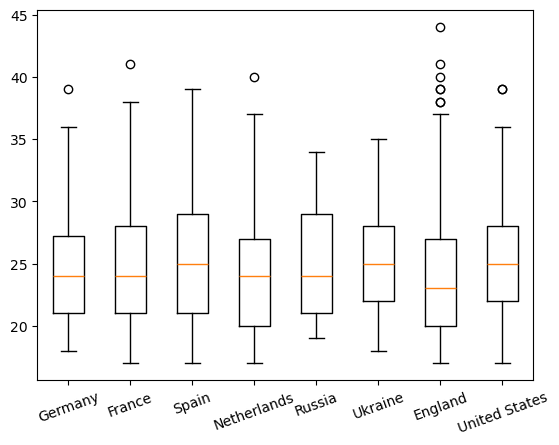

In [170]:
plt.xticks(rotation=20)

plt.boxplot(data, labels=countries_to_compare)

plt.show()

In [41]:
fifa.loc[(fifa['Release Clause'].notna()) & (fifa['Nationality'] == 'Russia'),  'Release Clause'].tolist()

[40700000.0,
 38900000.0,
 18700000.0,
 9400000.0,
 35700000.0,
 34500000.0,
 27500000.0,
 20700000.0,
 12600000.0,
 26100000.0,
 15400000.0,
 24200000.0,
 9800000.0,
 9400000.0,
 13700000.0,
 9200000.0,
 9400000.0,
 15000000.0,
 18400000.0,
 3300000.0,
 7900000.0,
 4800000.0,
 6800000.0,
 5800000.0,
 10900000.0,
 4300000.0,
 6300000.0,
 5700000.0,
 10300000.0,
 9400000.0,
 4000000.0,
 3900000.0,
 5500000.0,
 2300000.0,
 3500000.0,
 1300000.0,
 3800000.0,
 2000000.0,
 1200000.0,
 3200000.0,
 1500000.0,
 3200000.0,
 2900000.0,
 3000000.0,
 2300000.0,
 2100000.0,
 2700000.0,
 2200000.0,
 2000000.0,
 1400000.0,
 1600000.0,
 2700000.0,
 960000.0,
 2000000.0,
 1300000.0,
 780000.0,
 840000.0,
 900000.0,
 297000.0,
 326000.0,
 261000.0,
 384000.0,
 423000.0,
 483000.0,
 232000.0,
 186000.0,
 572000.0]

In [51]:
import torch

x = torch.tensor([0, 1, 2, 3, 4], dtype=torch.float32)
y = torch.tensor([1, 2, 8, 6, 12], dtype=torch.float32)

w = torch.tensor(0., dtype=torch.float32, requires_grad=True)
b = torch.tensor(0., dtype=torch.float32, requires_grad=True)

def forward(x):
    y_pred = w * x + b
    return y_pred

def loss(y, y_pred):
    return ((y - y_pred) ** 2).mean()

In [52]:
lr = 0.1
n_epochs = 150

for epoch in range(n_epochs):
    y_pred = forward(x)

    l = loss(y, y_pred)

    l.backward()

    with torch.no_grad():
        w.data -= lr * w.grad
        b.data -= lr * b.grad

    w.grad.zero_()
    b.grad.zero_()

    if (epoch+1) % 10 == 0:
        print("\nw:", w, '\nb:', b, '\ny_pred', y_pred.data, '\nepoch:', epoch+1, '\n')


w: tensor(2.5473, requires_grad=True) 
b: tensor(0.7501, requires_grad=True) 
y_pred tensor([ 0.7597,  3.3039,  5.8480,  8.3922, 10.9363]) 
epoch: 10 


w: tensor(2.5715, requires_grad=True) 
b: tensor(0.6811, requires_grad=True) 
y_pred tensor([ 0.6863,  3.2560,  5.8258,  8.3955, 10.9652]) 
epoch: 20 


w: tensor(2.5846, requires_grad=True) 
b: tensor(0.6438, requires_grad=True) 
y_pred tensor([ 0.6466,  3.2303,  5.8139,  8.3976, 10.9812]) 
epoch: 30 


w: tensor(2.5917, requires_grad=True) 
b: tensor(0.6237, requires_grad=True) 
y_pred tensor([ 0.6252,  3.2164,  5.8075,  8.3987, 10.9898]) 
epoch: 40 


w: tensor(2.5955, requires_grad=True) 
b: tensor(0.6128, requires_grad=True) 
y_pred tensor([ 0.6136,  3.2088,  5.8041,  8.3993, 10.9945]) 
epoch: 50 


w: tensor(2.5976, requires_grad=True) 
b: tensor(0.6069, requires_grad=True) 
y_pred tensor([ 0.6074,  3.2048,  5.8022,  8.3996, 10.9970]) 
epoch: 60 


w: tensor(2.5987, requires_grad=True) 
b: tensor(0.6037, requires_grad=True) 
y_p

In [ ]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(style="whitegrid")

x_np = x.detach().numpy()
y_np = y.detach().numpy()

x_line = np.linspace(x_np.min(), x_np.max(), 6)
y_line = w.detach() * x_line + b.detach()

sns.scatterplot(x=x_np, y=y_np, color='red')
sns.lineplot(x=x_line, y=y_line)

plt.show()

Epoch 10: w = 1.519938, b = 1.401719, loss = 5.44351244
Epoch 20: w = 1.702734, b = 1.822903, loss = 2.67095804
Epoch 30: w = 1.682706, b = 2.105452, loss = 2.45681882
Epoch 40: w = 1.645942, b = 2.311906, loss = 2.36338592
Epoch 50: w = 1.615460, b = 2.465382, loss = 2.31183815
Epoch 60: w = 1.592285, b = 2.579848, loss = 2.28313088
Epoch 70: w = 1.574929, b = 2.665272, loss = 2.26713896
Epoch 80: w = 1.561965, b = 2.729030, loss = 2.25822949
Epoch 90: w = 1.552288, b = 2.776617, loss = 2.25326681
Epoch 100: w = 1.545066, b = 2.812136, loss = 2.25050211
Epoch 110: w = 1.539675, b = 2.838646, loss = 2.24896169
Epoch 120: w = 1.535651, b = 2.858433, loss = 2.24810290
Epoch 130: w = 1.532648, b = 2.873202, loss = 2.24762440
Epoch 140: w = 1.530406, b = 2.884226, loss = 2.24735880
Epoch 150: w = 1.528733, b = 2.892453, loss = 2.24721026
Early brek on epoch 153 with loss change 8.821487426757812e-06


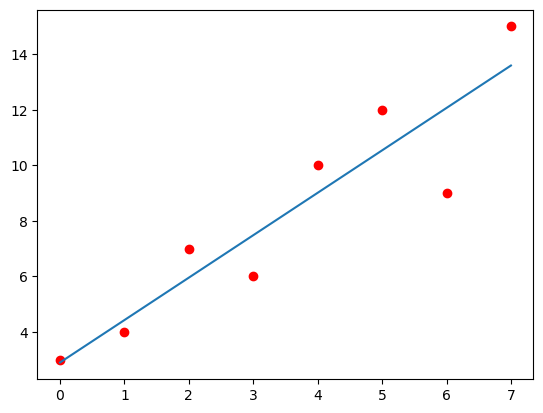

In [12]:
import torch
import torch.nn as nn

import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

x = torch.tensor([[0], [1], [2], [3], [4], [5], [6], [7]], dtype=torch.float32)
y = torch.tensor([[3], [4], [7], [6], [10], [12], [9], [15]], dtype=torch.float32)

n_samples, n_features = x.shape

class LinearRegression(nn.Module):
    def __init__(self, in_dim, out_dim):
        super().__init__()
        self.lin = nn.Linear(in_dim, out_dim)

    def forward(self, x):
        return self.lin(x)

lr = 0.05
n_epochs = 1000
min_loss_change = 1e-5
prev_loss = float('inf')

model = LinearRegression(n_features, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
loss_fn = nn.MSELoss()

y_pred = 0.0

for epoch in range(n_epochs):
    y_pred = model(x)

    current_loss = loss_fn(y, y_pred)

    optimizer.zero_grad()
    current_loss.backward()

    optimizer.step()

    if (epoch + 1) % 10 == 0:
        w = model.lin.weight.item()
        b = model.lin.bias.item()
        print(f'Epoch {epoch+1}: w = {w:.6f}, b = {b:.6f}, loss = {current_loss.item():.8f}')

    loss_change = abs(prev_loss - current_loss.item())
    if loss_change <= min_loss_change:
        print('Early brek on epoch', epoch+1, 'with loss change', loss_change.item())
        break
    prev_loss = current_loss

with torch.no_grad():
    plt.scatter(x, y, color='r')
    plt.plot(x, y_pred)
    plt.show()

In [66]:
import torch
from torch import nn
from torch import optim
from torch.utils.data import DataLoader

import torchvision
from torchvision import transforms
from torchvision import datasets

from matplotlib import pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [90]:
# Hyper
batch_size = 100
input_size = 28 * 28
hidden_size = 500
n_classes = 10
n_epochs = 10
learning_rate = 0.001

In [91]:
train_dataset = datasets.MNIST(root='./data',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset  = datasets.MNIST(root='./data',
                               train=False,
                               transform=transforms.ToTensor(),
                               download=True)

train_loader = DataLoader(train_dataset,
                          batch_size=batch_size,
                          shuffle=True)

test_loader  = DataLoader(test_dataset, 
                          batch_size=batch_size,
                          shuffle=True)

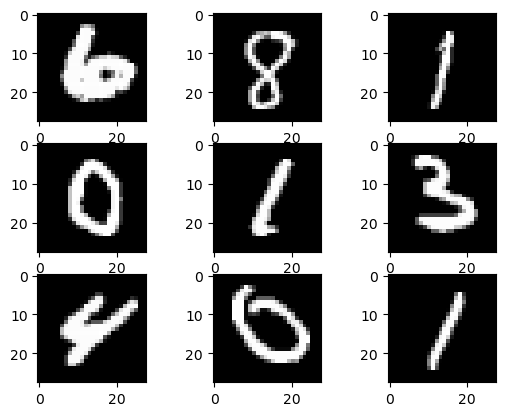

In [69]:
images_batch, labels = next(iter(train_loader))

for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images_batch[i][0], cmap='gray')

plt.show()

In [82]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, n_classes):
        super().__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, n_classes)

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out

In [87]:
model = NeuralNet(input_size, hidden_size, n_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

loss_progress = []

total_steps = len(train_loader)
for epoch in range(n_epochs):
    loss = torch.Tensor()
    for step, (images_batch, labels) in enumerate(train_loader):
        
        images_batch = images_batch.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        y_pred = model(images_batch)
        
        loss = criterion(y_pred, labels)

        optimizer.zero_grad()
        loss.backward()
        
        optimizer.step()

        if (step+1) % 200 == 0:
            print(f"Epoch: [{epoch+1}/{n_epochs}], step: [{step+1}/{total_steps}], loss: {loss}")
            loss_progress.append(loss.detach().item()) 

Epoch: [1/10], step: [200/600], loss: 0.2860362231731415
Epoch: [1/10], step: [400/600], loss: 0.29472237825393677
Epoch: [1/10], step: [600/600], loss: 0.05099339410662651
Epoch: [2/10], step: [200/600], loss: 0.09794313460588455
Epoch: [2/10], step: [400/600], loss: 0.0912378579378128
Epoch: [2/10], step: [600/600], loss: 0.17777763307094574
Epoch: [3/10], step: [200/600], loss: 0.029076097533106804
Epoch: [3/10], step: [400/600], loss: 0.02958228811621666
Epoch: [3/10], step: [600/600], loss: 0.035253092646598816
Epoch: [4/10], step: [200/600], loss: 0.049506738781929016
Epoch: [4/10], step: [400/600], loss: 0.05301868915557861
Epoch: [4/10], step: [600/600], loss: 0.018541937693953514
Epoch: [5/10], step: [200/600], loss: 0.030062692239880562
Epoch: [5/10], step: [400/600], loss: 0.031602516770362854
Epoch: [5/10], step: [600/600], loss: 0.0055273957550525665
Epoch: [6/10], step: [200/600], loss: 0.006908634211868048
Epoch: [6/10], step: [400/600], loss: 0.04703250899910927
Epoch: 

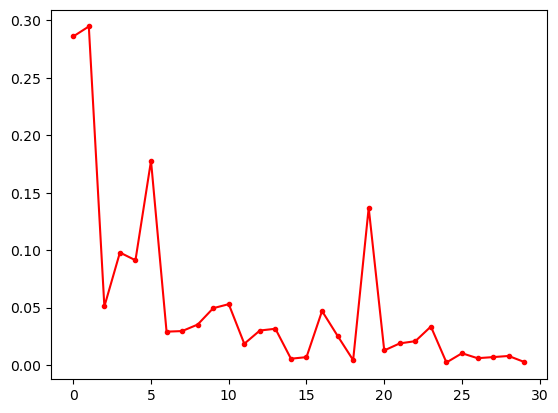

In [88]:
plt.plot(loss_progress, 'r.-')

plt.show()

In [89]:
with torch.no_grad():
    correct_total = 0
    
    for i, (images, labels) in enumerate(test_loader):
        images = images.reshape(-1, 28 * 28).to(device)
        labels = labels.to(device)
        
        y_pred = model(images).to(device)

        _, predicted = torch.max(y_pred, 1)

        correct_current = (predicted == labels).sum()

        correct_total += correct_current

    acc = correct_total / len(test_loader.dataset)
    print(acc)

tensor(0.9823, device='cuda:0')


### CNN on MNIST

In [140]:
import torch
from torch import nn
from torch import optim
from torch.utils.data import DataLoader

import torchvision
from torchvision import transforms
from torchvision import datasets

from matplotlib import pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [157]:
# Hyper
n_epochs = 10
batch_size = 200
lr = 0.001

In [158]:
train_data = torchvision.datasets.MNIST(root='./data',
                                        train=True,
                                        transform=transforms.ToTensor(),
                                        download=True)

test_data  = torchvision.datasets.MNIST(root='./data',
                                        train=False,
                                        transform=transforms.ToTensor(),
                                        download=True)

train_load = DataLoader(train_data,
                        batch_size=batch_size,
                        shuffle=True)

test_load  = DataLoader(test_data,
                        batch_size=batch_size,
                        shuffle=True)

In [181]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.relu = nn.ReLU()
        self.flatten = nn.Flatten()
        
        self.conv1 = nn.Conv2d(1, 64, 3, padding=1)   # N 64  28 28
        self.pool1 = nn.MaxPool2d(2)                  # N 64  14 14
        self.conv2 = nn.Conv2d(64, 128, 3, padding=0) # N 128 12 12
        self.pool2 = nn.MaxPool2d(2)                  # N 128  6  6
        self.lin1 = nn.Linear(128*6*6, 1024)
        self.lin2 = nn.Linear(1024, 10)

    def forward(self, x):
        out = self.relu(self.conv1(x))
        out = self.pool1(out)
        out = self.relu(self.conv2(out))
        out = self.pool2(out)
        out = self.flatten(out)
        out = self.lin1(out)
        out = self.lin2(out)
        return out

In [182]:
model = CNN().to(device)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

for epoch in range(n_epochs):
    model.train()
    running_loss = 0.0
    for i, (images, labels) in enumerate(train_load):
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        
        predict = model(images)
        loss = criterion(predict, labels)
        loss.backward()
        
        optimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(train_load)

    print(f"Epoch: [{epoch+1}/{n_epochs}], loss: {epoch_loss}")

Epoch: [1/10], loss: 0.17920109195013842
Epoch: [2/10], loss: 0.04898781949809442
Epoch: [3/10], loss: 0.033410275860223916
Epoch: [4/10], loss: 0.027478826992834608
Epoch: [5/10], loss: 0.02198516079185841
Epoch: [6/10], loss: 0.015853111919326087
Epoch: [7/10], loss: 0.012621449921474171
Epoch: [8/10], loss: 0.013539220762710708
Epoch: [9/10], loss: 0.01250498156058408
Epoch: [10/10], loss: 0.01013578784984323


In [263]:
import time

with torch.no_grad():
    model.eval()
    correct = 0
    
    for images, labels in test_load:  
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        _, preds = torch.max(outputs, 1)

        ## Plotting incorrect images
        # incorrect_indices = torch.where(preds != labels)[0].tolist()
        # 
        # if len(incorrect_indices) > 0:
        #     plt.ion()
        #     for i in incorrect_indices:
        #         
        #         plt.imshow(images[i][0].cpu(), cmap='gray')
        #         plt.title(f'Pred: {preds[i].item()}, True: {labels[i].item()}')
        #         plt.draw()
        #         plt.pause(1)
        #         plt.clf()
        #     plt.ioff()
        
        correct += (preds == labels).sum().item()

    acc = correct / len(test_loader.dataset)
    print(f"Accuracy: {acc * 100:.2f}%")

Accuracy: 99.14%
